# Introduction to Training Neural Networks with Keras
## And universal function approximation
## Part of CE811, University of Essex, 2020

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk


## A simple 1D function

- First build some datapoints that represent a simple 1D function, for the sake of a learning example...

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# dataset for a simple regression problem (1 input 1 output):
x_train=np.linspace(-2,2,100).astype(np.float32).reshape(100,1)
y_train=(np.sin(x_train*math.pi)*0.3+x_train+-2).astype(np.float32).reshape(100,1)

In [2]:
print("x_train",x_train.shape, x_train[0:10])
print("y_train",y_train.shape, y_train[0:10])

x_train (100, 1) [[-2.       ]
 [-1.9595959]
 [-1.919192 ]
 [-1.8787879]
 [-1.8383838]
 [-1.7979798]
 [-1.7575758]
 [-1.7171717]
 [-1.6767677]
 [-1.6363636]]
y_train (100, 1) [[-4.       ]
 [-3.9216182]
 [-3.8438475]
 [-3.7672892]
 [-3.692525 ]
 [-3.6201077]
 [-3.5505521]
 [-3.4843278]
 [-3.4218502]
 [-3.363474 ]]


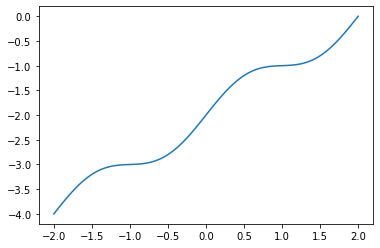

In [3]:
# show training set
plt.plot(x_train, y_train)

## Build a neural-network model capable of learning this function, from the datapoints
- Use Keras to build a 3-layer feed-forward network (i.e. with 2 hidden layers).
<img src="./images/ffnn_3layers.svg" alt="3-layer FFNN" width="400">

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define Sequential model with 3 layers
model = keras.Sequential(name="my_neural_network")
layer1=layers.Dense(10, activation="tanh", input_shape=(1,))
model.add(layer1)
layer2=layers.Dense(10, activation="tanh")
model.add(layer2)
layer3=layers.Dense(1)
model.add(layer3)

In [5]:
model.summary()

Model: "my_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


## Understanding the model architecture

- The above model print out shows us this is a 3-layer neural network.  

- The "Output Shape" shows us how many outputs each layer has.  The first dimension is the batch size (which is flexible, hence "None"), and the second dimension is the number of outputs for that layer.

- We can see from the final layer's output shape how many outputs this network has.

- We can see from line 7 of the code how many inputs this network has.

**Questions:** 

1. How many inputs and how many outputs does this neural network have?  **Answer**:
2. Why do all of the output shapes start with "None"?  **Answer**:
3. What is the "rank" of all of the output shapes?  **Answer**:



## Understanding model layers

- In this network layer1 and layer2 are called "hidden layers", because they are only used for the internal calculation of the network output.

- Each layer is parameterised by one or more tensors.  Tensors are just multidimensional arrays of numbers, e.g. a matrix or a vector.
    - E.g. a matrix of shape $5 \times 5$ is a rank-2 tensor of shape=(5,5)

- For each Dense layer, there is one weights matrix and one bias vector.  These can be seen below.  

- They are initially created with random values.


In [6]:
print("layer1 weights",layer1.trainable_weights)

layer1 weights [<tf.Variable 'dense/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.41742057,  0.0942719 ,  0.37613028, -0.03856498, -0.384623  ,
        -0.35715654,  0.13074309,  0.45161003,  0.18883032,  0.66952044]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]


Question:

1. How many parameters in W and b are there for the first layer? **Answer:**


In [8]:
print("layer2 weights",layer2.trainable_weights)

layer2 weights [<tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.21779642,  0.2891119 ,  0.48108017, -0.18359745, -0.45352882,
         0.37127495, -0.52843744, -0.53009945, -0.36978608, -0.4600715 ],
       [ 0.4373513 , -0.12481409, -0.42145985, -0.36179   ,  0.13139886,
         0.0638091 ,  0.5008149 , -0.3921352 , -0.01387179, -0.04677099],
       [ 0.47210646, -0.06752574, -0.3003423 , -0.10881665,  0.3131482 ,
         0.22569168,  0.03907496, -0.49069148,  0.03982872,  0.37647086],
       [-0.17339751, -0.30422935, -0.06199682, -0.41487473,  0.35192454,
        -0.26363567, -0.40562147,  0.40462363,  0.09979177, -0.05588415],
       [ 0.41920578,  0.22364068, -0.4256137 , -0.39103657,  0.5083028 ,
         0.32568485, -0.21932036,  0.22510618,  0.23135394,  0.4970138 ],
       [-0.09095219, -0.33222854, -0.32401556, -0.44280317,  0.34680718,
         0.12376416,  0.0872097 ,  0.4076423 , -0.41173607, -0.11515221],
       [-0.38450497, -0.12407342,

In [9]:
print("layer3 weights",layer3.trainable_weights)

layer3 weights [<tf.Variable 'dense_2/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[ 0.06043935],
       [-0.38652188],
       [ 0.19531143],
       [ 0.05377668],
       [-0.08651119],
       [ 0.5629079 ],
       [ 0.5103082 ],
       [ 0.24011737],
       [-0.4563308 ],
       [ 0.10647345]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


**Questions:**

1. How many parameters in W and b are there for the second layer?  **Answer**:

2. Do these match what the model printout said (on previous slide) **Answer**:


- Each layer acts as a callable function, and the whole model we have created acts as a callable function.

- Layer1 has a weights matrix W (with shape \[1,10\]) and a bias vector b (with shape \[10\]).  It computes its output $y$ for an input $x$ by $y=tanh(xW+b)$

In [5]:
# Try putting a single input into the layer 1
print(layer1(np.array([[4]])))

tf.Tensor(
[[ 0.8284952  -0.3508217   0.983407   -0.99176884 -0.55092657  0.78563935
   0.8695636   0.9938032  -0.79578537  0.9920649 ]], shape=(1, 10), dtype=float32)


Can you verify that this matches $y=tanh(xW+b)$?  
- **Do this**: Fill in the missing line of code below to help you, and check you get the same output as above.

In [6]:
x=tf.constant([[4.0]])
W=layer1.trainable_weights[0] # This is the weight matrix of shape [1,10]
b=layer1.trainable_weights[1] # This is the bias vector of shape [10]
print(tf.matmul(x,W))  # TODO fix this line using the tensorflow functions tf.tanh(A) and tf.matmul(A,B) and the tf.add(A,B) functions.  

tf.Tensor(
[[ 1.1833184  -0.36638045  2.391794   -2.7444215  -0.6197107   1.0599358
   1.3312871   2.8868768  -1.0870131   2.7628186 ]], shape=(1, 10), dtype=float32)


- Note that in the final add in the above code, tensorflow used ["broadcasting"](https://numpy.org/devdocs/user/theory.broadcasting.html) to allow it to add a rank-2 tensor (a 2d array) to a rank-1 tensor (a 1d array).

- The whole network acts as a function too.  It just puts the input into the first layer, and then the output of that into the next layer, and so on.


**Questions:** 

1. If the $k$th layer can be written as a function $y=tanh(x.Wk+bk)$, then how could we write the whole network as a single mathematical function?  **Answer:**  (Enter in markdown here):

2. Why do we need the tanh functions after every layer?  What would happen if we removed them?  **Answer:**


- The neural network expects its input to be a rank-2 tensor (i.e. a matrix)
- Each row of that matrix corresponds to a different input vector.

In [7]:
# Try putting a single input into the whole network
print(model(np.array([[4]])))

tf.Tensor([[-0.2342509]], shape=(1, 1), dtype=float32)


In [8]:
# Try putting a "batch" of 2 input vectors through the network
print(model(np.array([[4],[2]])))

tf.Tensor(
[[-0.23425087]
 [ 0.07320121]], shape=(2, 1), dtype=float32)


- Notice how even though the model function accepts 1 input, it can process two 1d-vector inputs at the same time.  They are processed independently of each other - we see we get the same output now when we push "4" though the model as when we pushed "4" though on its own.

In [9]:
# Let's put a whole "batch" of x values through:
print("input vectors", x_train[0:10,:])
print("output vectors", model(np.array(x_train[0:10].reshape(10,1))))

input vectors [[-2.       ]
 [-1.9595959]
 [-1.919192 ]
 [-1.8787879]
 [-1.8383838]
 [-1.7979798]
 [-1.7575758]
 [-1.7171717]
 [-1.6767677]
 [-1.6363636]]
output vectors tf.Tensor(
[[-0.07320121]
 [-0.08029761]
 [-0.08731581]
 [-0.09424214]
 [-0.10106359]
 [-0.10776543]
 [-0.11433295]
 [-0.12075051]
 [-0.12700114]
 [-0.13306844]], shape=(10, 1), dtype=float32)


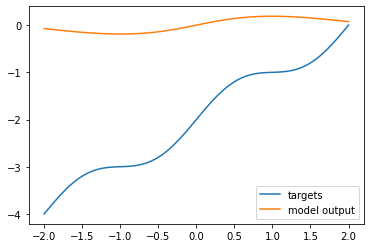

In [10]:
# Let's plot the model's current behaviour:
plt.plot(x_train, y_train, label = "targets")
plt.plot(x_train, model(x_train).numpy(),label="model output")
plt.legend()

- The above graph shows the neural network is not doing what we want it to yet
    - because we've just build our network with entirely random weights.  

## Training the neural network

So next we'll "train" the network, i.e. change the values of its weights so that its outputs match the target curve.  Note, that by the universal function approximation theorem for neural networks, if we have enough weights and hidden layers, then we can in theory learn any function to arbitrary accuracy.  

There is no closed-form solution to this "training" problem, so we need to use an iterative numerical method.

First we define a loss function which we want to minimise with respect to all of the trainable variables in the neural network.



In [11]:
model.compile(
    optimizer=keras.optimizers.Adam(0.01),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

Next we run the iterative procedure.  Here we say we're going to run a full pass through the training set (all of the elements of x_train), 1000 times...

In [12]:
history = model.fit(
    x_train,
    y_train,
    batch_size=len(x_train),
    epochs=1000
)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.9537 - mean_squared_error: 4.9537
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.4679 - mean_squared_error: 4.4679
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.0394 - mean_squared_error: 4.0394
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.6667 - mean_squared_error: 3.6667
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.3450 - mean_squared_error: 3.3450
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.0678 - mean_squared_error: 3.0678
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.8270 - mean_squared_error: 2.8270
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.6128 - mean_squared_error: 2.6128
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.4149 - mean_squared_error: 2.4149
Epoch 10/1000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 151/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 152/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 153/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 154/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 155/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 156/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 157/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 158/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 159/1000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 299/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 300/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 301/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 302/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 303/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 304/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 305/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 306/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 307/1000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 447/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 448/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 449/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 450/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 451/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 452/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 453/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 454/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 455/1000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 595/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 596/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 597/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 598/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 599/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 600/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 601/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 602/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 603/1000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 743/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 744/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 745/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 746/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 747/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 748/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 749/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 750/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 751/1000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 891/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 892/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 893/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 894/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 895/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 896/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 897/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 898/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 899/1000
1/1 [=====

Now we see how the neural network's output has (hopefully) improved...

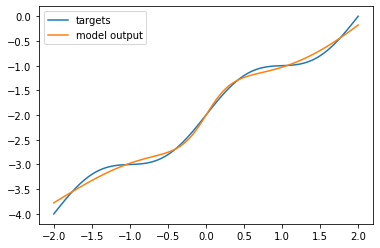

In [13]:
plt.plot(x_train, y_train, label = "targets")
plt.plot(x_train, model(x_train).numpy(),label="model output")
plt.legend()

Run the previous 2 cells again to train the network a bit more.  

We can see the universal function approximation capability of the neural network in action.

Next we'll view how some of the weights have changed from earlier, by the training process

In [14]:
print("layer1 weights",layer1.trainable_weights)

layer1 weights [<tf.Variable 'dense/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[-0.09271087, -0.241206  ,  0.4490061 , -0.3389768 ,  0.25488597,
        -0.25145313,  0.08051342,  0.89309347, -0.728286  ,  0.28077978]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
array([ 0.25870937,  0.25994417, -0.23141952,  0.08770128,  0.28791255,
        0.20660007,  0.2899449 ,  0.17075583,  0.12587765, -0.04695916],
      dtype=float32)>]


## Understanding the Training Objective, and Loss Function

These weights have changed - because the training process works by iteratively adjusting the weights to perform gradient descent on the "loss" function.  Here we used the Mean Squared Error, so we have minimised
$$L=(1/N)\sum_{k=1}^N (f({x}_k,w)-y_k)^2$$
with respect to all of the weights $w$, where $w=$(layer1.traininable_weights, layer2.trainable_weights, layer3.trainable_weights), and where $f$ is the neural network model, and $(x_k, y_k)$ are the $k$th training point's $x$ and (target) $y$ value.

We can plot how $L$ decreased over time during training...

Text(0.5, 0, 'epoch')

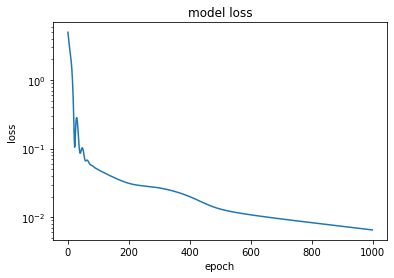

In [15]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('epoch')

## Varying the Learning rate
- Try the above experiments again with a different learning rate.
- I found with learning rate Adam 0.001, I could get the neural output matching the targets almost perfectly.  **Try This**

## Saving your network

- We can save our final model, and its weights and biases, as follows:

In [16]:
model.save('saved_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/assets


- We can then load it back at a later date with...

In [17]:
model2 = keras.models.load_model('saved_model') # just need to give it a folder name here.
model2.summary()

Model: "my_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


## Further Challenges

If you get time today then:

- What happens if we put a tanh activation function into the final layer?  Try it?  What problems do we get for learning this particular dataset?  **Answer:**

- What will happen to the function approximation capabilities of this network if we increase the number of nodes in each hidden layer?  **Answer:**

## Follow-up Reading

- Learn more about the [keras train and evaluate](https://www.tensorflow.org/guide/keras/train_and_evaluate) process.

-  For most learning tasks you need a validation set too, and you can use it to check you are not overfitting the data.  See [overfit and underfit](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)
